## Advanced Electromagnetism - MagRAM permeability simulation

### Yves HERI

#### Michigan State Univeristy

___

This notebook contains code for the simulation of the permeability of the MagRAM layer with frequency dependence in the band from 2 GHz to 18 GHz. Youcan refer to the paper "[Broadband material characterization method using a CPW with a novel calibration technique](https://pure.tue.nl/ws/portalfiles/portal/20450792/MatChar_01_Final.pdf)" for more information regarding the simulation parameters.

___

#### Import Librairies 


In [1]:
import numpy as np                          # For mathematical function 
import matplotlib.pyplot as plt             # For plotting 
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_context("paper",font_scale = 1.4)   # Plot style customization
from scipy import constants as cst

#### Define global parameters

In [2]:
mu_o= cst.mu_0               # Permeability of free space
c= cst.c                    # Speed of light
eps_o=cst.epsilon_0             # Compute the permitivity of free space

#### Define functions

 The permeability  of the MagRAM layer is frequency dependent in the band from 2 GHZ to 18 GHz with $\mu(\omega)=(\mu_r'-j\mu_r'')\mu_0$ we can approximate
 
\begin{align}
    \mu_r'&=-0.001357f^3+0.05304f^2-0.6441f+3.045\\
    \mu_r''&=-0.0002912f^3+0.02065f^2-0.4352f+2.961
\end{align}

where $f$ is the frequency in GHz, in the given band. 

In [3]:
def mu_prime(f):                # Computation of mu' with input the frequency in GHz
    mu=-0.001357*f**3+0.05304*f**2-0.6441*f+3.045
    return mu

def mu_d_prime(f):              # Computation of mu" (Eq. XX) with input the frequency in GHz
    mu=-0.0002912*f**3+0.02065*f**2-0.4352*f+2.961
    return mu

The wavenumber $k=\beta - j\alpha$, where $\beta$ and $\alpha$ are respectively the phase   and attenuation constants for the wave inside the MagRAM.

In [4]:
def wave_number(f):             # Computation of the wave number with input the frequency in GHz
    omega=2*np.pi*f*1e9           # Angular frequency, with the frequency in Hz
    mu=(mu_prime(f)-mu_d_prime(f)*1j)*mu_o  # MagRAM permeability, by calling functions for mu' and mu''
    eps=(6.95-0.1j)*eps_o         # MagRAM permitivity
    k=omega*np.sqrt(mu*eps)       # Compute the wave number
    return k

def phase_constant(f):          # Compute the phase constant with input the frequency in GHz (Eq. )
    k=wave_number(f)              # Calling the wave number function
    return np.real(k)             # Taking the real part of the wave number

def attenuation_constant(f):    # Compute the attenuation constant  with input the frequency in GHz (Eq. )
    k=wave_number(f)
    return -np.imag(k)            # Taking the opposite of the imaginary part of the wave number

The skin depth $\delta$  is the distance over which the magnitude of a propagating uniform plane wave is reduced by a factor of  $1/e$. It is given by

\begin{equation}
    \delta=\frac{1}{\alpha}
\end{equation}

where $\alpha$ is the attenuation constant as defined above.

In [5]:
def skin_depth(f):              # Compute the skin depth with input the frequency in GHz (Eq. )
    d=1/(attenuation_constant(f))
    return d

The phase velocity is the speed at which a point of constant phase travels as the wave propagates. It is given by

\begin{equation}
    v_p=\frac{\omega}{\beta}
\end{equation}

where $\omega$ is the angular frequency and $\beta$ the attenuation constant.

In [6]:

def phase_velocity(f):          # Compute the phase velocity with input the frequency in GHz (Eq. )
    beta=phase_constant(f)        # Calling the phase_constant function
    omega=2*np.pi*f*1e9           # Angular frequency, with the frequency in Hz
    vp=omega/beta
    return vp


The reflection coefficient $R$ is written as

\begin{align*}
    R=\frac{\Gamma-P^2}{1-\Gamma P^2}
\end{align*}

where we call the interfacial reflection coefficient $\Gamma$ as

\begin{equation*}
    \Gamma=\left(\frac{\eta-\eta_0}{\eta+\eta_0}\right)
\end{equation*}

and $P=e^{-jk\Delta}$, the transmission factor for the wave passing through the MagRAM layer. $\Delta$ is the thickness of the MagRAM and $\eta_0$ and intrinsic impedance of the free space given by $\eta_0=\sqrt{\mu_0/\varepsilon_0}$ and the intrinsic impedance of the layer expressed by $\eta=\sqrt{\mu(\omega)/\varepsilon}$.

In [7]:
def reflectivity(f,Delta=3.3e-3):      # Compute the reflectivity in dB with input the frequency in GHz 
    mu=(mu_prime(f)-mu_d_prime(f)*1j)*mu_o
    eps=(6.95-0.1j)*eps_o         # Compute the reflectivity in dB with input the frequency in GHz (Eq. ) 
    eta=np.sqrt(mu/eps)           # Compute the intrinsic impedance of MagRAM
    eta_o=np.sqrt(mu_o/eps_o)     # Compute the intrinsic impedance of the free space
    Gamma=(eta-eta_o)/(eta+eta_o) # Compute the interfacial reflection coefficient
    k=wave_number(f)            
    P=np.exp(-1j*k*Delta)         # Compute the transmission factor  
    R=(Gamma-P**2)/(1-Gamma*P**2) # Compute the reflection coefficient
    R_abs=np.abs(R)               # Take the magnitude of the reflection coefficient
    R_abs_dB=20*np.log10(R_abs)   # Compute magnitude of the reflection coefficient in dB
    return R_abs,R_abs_dB

The time-average power per unit area dissipated inside the MagRAM layer is 

\begin{equation}
    P_d= \frac{\big|E_0\big|^2}{2\eta_0}\left(1-\big|R\big|^2\right)
\end{equation}

In [8]:
def power_dissipated(f,E_0=10):
    eta_o=np.sqrt(mu_o/eps_o)
    R_abs,Rabs_dB=reflectivity(f)
    S=(np.abs(E_0)**2/(2*eta_o))*(1-R_abs**2)
    return S

#### Define parameters

In [9]:
f=np.linspace(2,18,1000) # the frequency range, 
Delta=3.3e-3             # thickness of the layer   
V=10                     # Amplitude of the phaser electric field

#### Plots results 

### 1. Plot $\mu'$ and $\mu"$

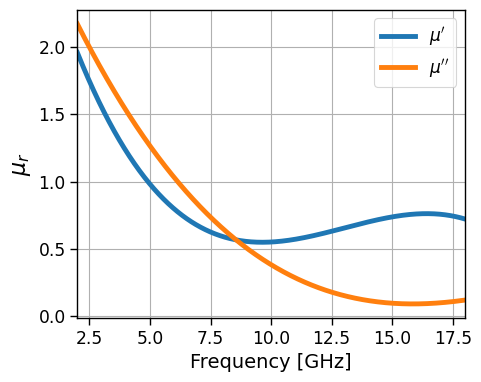

In [10]:
Mu_prime=mu_prime(f)
Mu_d_prime=mu_d_prime(f)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,Mu_prime,lw=3.5,label='$\mu\'$')
plt.plot(f,Mu_d_prime,linewidth=3.5,label='$\mu\'\'$')
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('$\mu_r$', fontsize=16)
plt.grid()
plt.xlim(2,18)
plt.legend()

### 2. Plot phase and attenuation constants

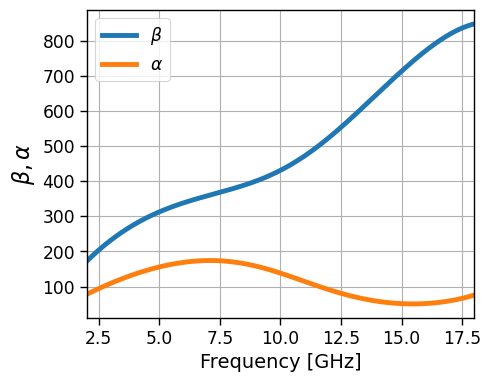

In [11]:
alpha=attenuation_constant(f)
beta=phase_constant(f)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,beta,lw=3.5,label='$\\beta$')
plt.plot(f,alpha,linewidth=3.5,label='$\\alpha$')
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('$\\beta, \\alpha$', fontsize=16)
plt.grid()
plt.xlim(2,18)
plt.legend()

### 3. Plot the skin depth

(2.0, 18.0)

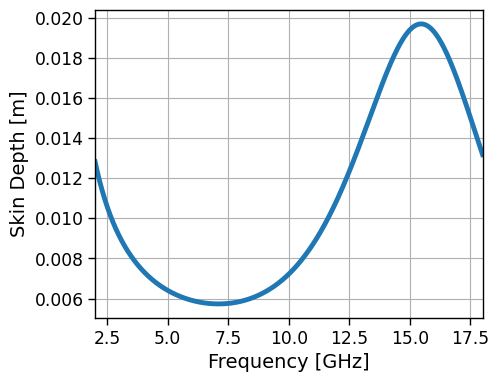

In [12]:
depth=skin_depth(f)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,depth,lw=3.5,label='$Skin Depth$')
# plt.plot(f,Delta/depth,lw=3.5,label='$Thickness / Skin Depth$') # Decomment this line to plot the ration thickness/skin depth
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('Skin Depth [m]', fontsize=14)
plt.grid()
plt.xlim(2,18)

### 4. Plot the ratio phase velocity to speed of light

(2.0, 18.0)

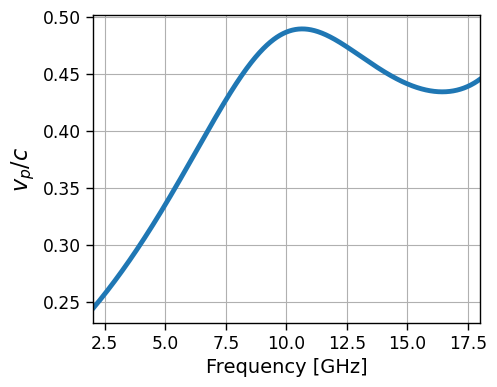

In [13]:
V_p=phase_velocity(f)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,V_p/c,lw=3.5,label='$depth$')
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('$v_p/c$', fontsize=16)
plt.grid()
plt.xlim(2,18)

### 5. Plot the reflectiivty in dB

(2.0, 18.0)

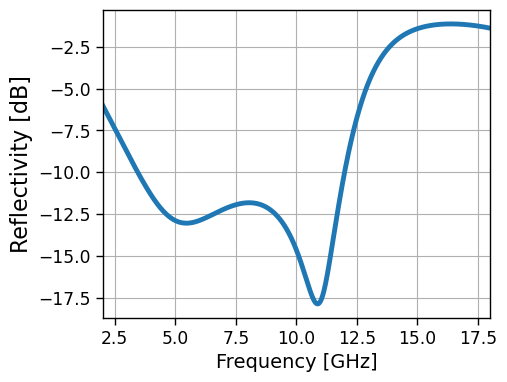

In [14]:
R_abs,R_dB=reflectivity(f,Delta)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,R_dB,lw=3.5,label='$Reflectivity$')
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('Reflectivity [dB]', fontsize=16)
plt.grid()
plt.xlim(2,18)

### 6. Plot the power dissipated

(2.0, 18.0)

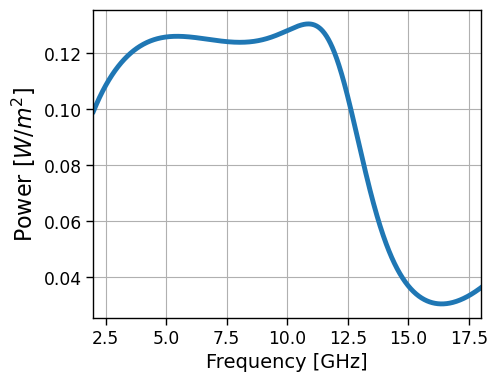

In [15]:
S=power_dissipated(f)

figure(figsize=(5, 4), dpi=100)
plt.plot(f,S,lw=3.5,label='$Power$')
plt.xlabel('Frequency [GHz]', fontsize=14)
plt.ylabel('Power [$W/m^2$]', fontsize=16)
plt.grid()
plt.xlim(2,18)

___